<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Anthony Mauricio Goyes Díaz  <br>
Fecha: 17/07/2022

# Importación de librerias necesarias

In [68]:
#Para esta actividad se importarán las siguientes librerías:
'''Se importa el módulo pandas que permite cargar la colección de datos'''
import pandas as pd
'''Se importa el módulo numpy que permite realizar operaciones de redondeo'''
import numpy as np
'''Se importa el módulo para graficar datos de forma estadística'''
import matplotlib.pyplot as plt
'''Se importa el módulo para trabajar con la estandarización de los datos'''

from sklearn.preprocessing import StandardScaler
'''Se importa el módulo para dividir los datos en un conjunto de entrenamiento y prueba'''
from sklearn.model_selection import train_test_split
'''Se importa el módulo para trabajar con la Regresión Lineal'''
from sklearn import linear_model

'''Se importa el módulo de metricas para realizar la precisión de la regresión lineal'''
from sklearn import metrics
'''Se importa el módulo para el cálculo del error cuadratico y varianza'''
from sklearn.metrics import mean_squared_error, r2_score

## Cargar el Dataset

In [69]:
#Código para cargar el Datase
'''Se carga la colección de datos de la calidad de vinos blancos,
con extensión csv con una separación de campos por punto y coma'''
df = pd.read_csv("winequality-red.csv", sep=";")
'''Se visualiza los dos primeros campos en encabeza la colección de datos'''
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [70]:
'''Se obtiene una descripción estadística de las propiedades de la colección de datos'''
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Descripción de la fuente del Dataset

La colección de datos de la calidad del vino blanco cuenta con un total de 4898 registros. Tiene 12 características incluida la objetivo que representa la calidad del vino mediante clases que van del 0 al 10 para su evaluación. A continuación se mostrará la finalidad de cada atributo que presenta la colección de datos seleccionada:

**quality:** categórica. La calidad del vino rojo (entre 0 y 10)

**fixed acidity:** Continuo. La acidez fija del vino rojo

**volatile acidity:** Continuo. La acidez volátil	del vino rojo

**citric acid:** Continuo. El ácido cítrico del vino rojo

**residual sugar:** Continuo. La azúcar residual

**chlorides:** Continuo. Cantidad de cloruros que presenta el vino rojo

**free sulfur dioxide:** Continuo. Cantidad de dióxido de azufre libre

**total sulfur dioxide:** Continuo. Cantidad de dióxido de azufre total

**density:** Continuo. La densidad del vino rojo

**pH:** Continuo.  Medida de acidez o alcalinidad del vino rojo

**sulphates:** Continuo. Cantidad de sulfatos

**alcohol:** Continuo. Cantidad de alcohol

## Explique el problema a resolver. 
Se pretende generar un modelo de aprendizaje automático que permita predecir la calidad del vino rojo en función de sus características de entrada. Para lo cuál se utilizará la colección de datos de vinos blancos descrito en el apartado anterior. Donde, la variable objetivo se denomina "quality" y existen 1 variables de entrada conocidas como: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates y alcohol.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


### Número de instancias en total

In [71]:
'''Determina el número total de registros'''
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

### Número de atributos de entrada, su significado y tipo

**fixed acidity:** Continuo. La acidez fija del vino blanco

**volatile acidity:** Continuo. La acidez volátil	del vino blanco

**citric acid:** Continuo. El ácido cítrico del vino blanco

**residual sugar:** Continuo. La azúcar residual

**chlorides:** Continuo. Cantidad de cloruros que presenta el vino blanco

**free sulfur dioxide:** Continuo. Cantidad de dióxido de azufre libre

**total sulfur dioxide:** Continuo. Cantidad de dióxido de azufre total

**density:** Continuo. La densidad del vino

**pH:** Continuo.  Medida de acidez o alcalinidad del vino blanco

**sulphates:** Continuo. Cantidad de sulfatos

**alcohol:** Continuo. Cantidad de alcohol

In [72]:
'''Remueve la variable objetivo y muestra la información de las propiedades restantes'''
df.drop('quality', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


### Estadísticas de la variable objetivo.

<AxesSubplot:>

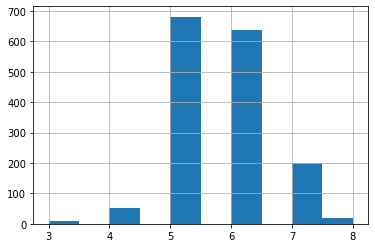

In [73]:
#Código que responde a la descripción anterior
'''Permite generar una grafica en una sola ejecución'''
%matplotlib inline
'''Crea un gráfico de barras con la variable objetivo (quality)'''
df['quality'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [8]:
'''Retorna la cantidad de valores nulos por cada propiedad'''
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
'''Muestra los campos duplicados de la colección de datos'''
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [20]:
'''Se realiza la transformación de la caracteristica objetivo (y)'''
VariableObjetivo=['quality']
'''Se realiza la transformación de las caracteristicas restantes (x)'''
VariablesEntrada=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [21]:
'''Asgina los valores de las caracteristicas de entrada a la variable X'''
X=df[VariablesEntrada].values
'''Asgina los valores de la caracteristica objetivo a la variable y'''
y=df[VariableObjetivo].values

In [80]:
'''Se estadariza los valores escalares de X'''
VariablesEntradaScaler=StandardScaler()
'''Se estadariza los valores escalares de y'''
VariableObjetivoScaler=StandardScaler()

In [25]:
'''Almacenamiento del objeto de ajuste para referencia posterior'''
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [26]:
'''Generación de los valores estandarizados de X e y'''
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [29]:
'''Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
'''Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119, 1)
(480, 11)
(480, 1)


## Regresión Lineal

In [52]:
'''Creación del  modelo de regresión lineal'''
regresion = linear_model.LinearRegression()

In [53]:
#Entrenamiento
'''Se crea el modelo en datos de entrenamiento'''
regresion.fit(X_train, y_train)
'''Se imprime el coeficiente del modelo''' 
print('Coeficientes: \n', regresion.coef_)

Coeficientes: 
 [[ 0.05060166 -0.24381504 -0.0597885   0.01350945 -0.09753729  0.05893993
  -0.13295052 -0.03327862 -0.06103188  0.17061005  0.38531115]]


In [55]:
#Test
'''Se generan los datos de predicción'''
y_pred = regresion.predict(X_test)

## Evaluación del Modelo

In [58]:
# Error cuadrático medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y_test, y_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Varianza: %.2f' % r2_score(y_test, y_pred))

Error cuadratico medio: 0.63
Varianza: 0.35


In [64]:
'''Tabla auxiliar de y_test escalado'''
y_aux = pd.DataFrame (y_test, columns =['y_aux'])
'''Obtencion de datos escalados inversamente'''
y_test_inverso = VariableObjetivoFit.inverse_transform(y_aux)
'''Tabla auxiliar de y_pred escalado'''
y_aux = pd.DataFrame (y_pred, columns =['y_aux'])
'''Obtencion de datos escalados inversamente'''
y_pred_inverso = VariableObjetivoFit.inverse_transform(y_aux)
'''Tabla con datos de precio de prueba y predecidos'''
df = pd.DataFrame(list(zip([i[0] for i in y_test_inverso],[ i[0] for i in y_pred_inverso])),columns =['Valor de prueba','Valor predecido'])
'''Se determina el error de la prueba y la predicción'''
df['error']=abs(df['Valor de prueba']-df['Valor predecido'])
df

,Valor de prueba,Valor predecido,error
0,6.0,5.356763,0.643237
1,5.0,5.090715,0.090715
2,6.0,5.625538,0.374462
3,5.0,5.448861,0.448861
4,6.0,5.744784,0.255216
...,...,...,...
475,7.0,5.597986,1.402014
476,8.0,6.105900,1.894100
477,6.0,5.744784,0.255216
478,7.0,6.101798,0.898202


In [61]:
''' Se imprimeEstadistica general de los datos analizados
df.describe()

,Precio de prueba,Precio predecido
count,480.000000,480.000000
mean,5.668750,5.656001
std,0.797087,0.469852
min,3.000000,4.673582
25%,5.000000,5.274919
50%,6.000000,5.590619
75%,6.000000,6.004243
max,8.000000,6.921279


Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 